# Data Visualization Notebook

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/">This <a property="dct:title" rel="cc:attributionURL" href="https://github.com/mauriciohbc/data-viz-notebook">Data Visualization Notebook</a> © 2024 by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.linkedin.com/in/mhbcardoso/">Mauricio Henrique BEZERRA CARDOSO</a> is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" alt=""><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" alt=""><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1" alt=""><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" alt=""></a></p>

## Welcome to this data visualization notebook

Before getting hands on, be reminded that in a corporate environment, you will be solicited by some client to solve one problem. To satisfy your client the most, it is important to keep the following in mind:

* **Understand your client's context and needs**: here a list of non-exhaustive reasons you might be solicited for by your client:
    * They may want some convincing data-driven arguments to support their ideas to top management
    * They may want important insights to make the best data-oriented decision
    * They may need to follow some chosen KPI to evaluate some performances (sales, traffic on a web-page, machine operations, ...)<br>
Sometimes, your client have a clear idea of what they want. This could facilitate your work if you are provided the pertinent data to satisfy the request. If your client need is not so clear, this is not necessarily a problem. While exploring the data, you can give constant feedback on what can be tracked and propose some insights or KPI to follow. Interacting regularly with your client can help them understand better their needs and precise their request.
* **Take your time to understand your data**: you will get through some recommendation on that later. Be sure to identify the data owner, who can provide you some clarification or extra data if needed. Note that the data owner is not necessarily your client.
* **What is the expected deliverable?** Is your study a one-time only? Does your client need to interact with the data? Does your client need to be constantly checking the visualization? The answers to those questions are important to choose the most adapted way to your deliverable: a simple powerpoint? A report on a data visualization tool? A simple website regularly updated? Note that if the requested deliverable is a website, you might want to have the support of web developers.
* **Be careful when making conclusion, especially when stablishing causality**: just because variables seem to increase or decrease simultaneously (statistically speaking, those variables are correlated), it does not necessarily mean there is a causality link between them, although this can be an interesting hypothesis to be investigated. It is always worth remembering: [correlation does necessarily not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation).

Enough talk, let's get started!

In this assignment, you will be given a dataset concerning energy consumption and production in France from 2012 to 2022.

You will be guided through a first exploratory data visualization, to quickly gather some insights on the topic under study. Then you will be given some precise request on data visualization to produce. You will code in Python using the following libraries:

* `pandas`: to manipulate the data set and make some plots (with calls to other libraries, such as `matplotlib`).
* `plotly`: to produce some plots.

Check here the documentation for each library: [pandas](https://pandas.pydata.org/docs/index.html), [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com/python/).

In this notebook, you will get asked some open questions. You are encouraged to seize each question, think about what is asked and take some notes. Do that whenever you read _Take a pause and think about it_. Be reassured, if you keep reading, you will have some insights on the open questions.

## Library import and default settings

Before exploring the dataset, import all the libraries you will use in this notebook and define default setting for `plotly` graphs.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
px.defaults.width = 1200
px.defaults.height = 600

## Dataset import and exploration

The database you will use has already been prepared for you. Raw data is made available by RTE (Réseau de Transport d'Electricité), the electricity transmission system operator of France. It can be found in the [here](https://www.rte-france.com/eco2mix/telecharger-les-indicateurs). More information on the data can be found [here](https://assets.rte-france.com/prod/public/2020-07/%C3%A9CO2mix%20-%20Description%20des%20fichiers%20des%20donn%C3%A9es%20en%20puissance.pdf), in French.

Import the dataset and explore it a little bit.

In [2]:
power_df = pd.read_csv("https://github.com/mauriciohbc/data-viz-notebook/blob/main/energy_production_and_consumption.csv?raw=true", 
                        index_col=0,
                        parse_dates=True)
power_df.index.freq = power_df.index.inferred_freq
power_df.head()

Consumption  Forecast D-1  Forecast D  Fuel oil  Coal  \
2012-01-01 00:00:00        58315         58200       58200       492    25   
2012-01-01 00:30:00        58315         57200       56900       492    25   
2012-01-01 01:00:00        56231         55200       55100       492    25   
2012-01-01 01:30:00        56075         56000       55400       491    25   
2012-01-01 02:00:00        55532         56000       55000       492    25   

                      Gas  Nuclear  Wind  Solar  Hydraulic  Hydralic pumping  \
2012-01-01 00:00:00  3816    52697  3588      0       7922             -1139   
2012-01-01 00:30:00  3816    52697  3588      0       7922             -1139   
2012-01-01 01:00:00  3834    51747  3536      0       7598             -1730   
2012-01-01 01:30:00  3832    51950  3526      0       7299             -2134   
2012-01-01 02:00:00  3839    51625  3535      0       7159             -2449   

                     Bioenergies  Physical exchange  
2012-01-01 00:00:00          719              -9806  
2012-01-01 00:30:00          719              -9806  
2012-01-01 01:00:00          721              -9993  
2012-01-01 01:30:00          722              -9636  
2012-01-01 02:00:00          719              -9412

In [3]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192864 entries, 2012-01-01 00:00:00 to 2022-12-31 23:30:00
Freq: 30T
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Consumption        192864 non-null  int64
 1   Forecast D-1       192864 non-null  int64
 2   Forecast D         192864 non-null  int64
 3   Fuel oil           192864 non-null  int64
 4   Coal               192864 non-null  int64
 5   Gas                192864 non-null  int64
 6   Nuclear            192864 non-null  int64
 7   Wind               192864 non-null  int64
 8   Solar              192864 non-null  int64
 9   Hydraulic          192864 non-null  int64
 10  Hydralic pumping   192864 non-null  int64
 11  Bioenergies        192864 non-null  int64
 12  Physical exchange  192864 non-null  int64
dtypes: int64(13)
memory usage: 20.6 MB


As stated before, it is essential to understand your data before moving on.

Here, you are working with structured data. You must be sure that you fully understand each column and row. What does each row mean? Are there quantitative columns? If so, do you know the units (distance, energy, currency)? Is it count, average, sum, standard deviation? Is there any qualitative column? If so, do you know what each different class mean?

When columns' names are well chosen, understanding the data becomes easier. This is case for the dataframe you will work with. Nevertheless, units for each column are not clear. Extra information on the data is needed.

The dataframe ```power_df``` is composed of thirteen columns and has timestamp index, with a 30 min frequency. For each row, you have the actual power consumption for each timestamp and the forecast made on the day and on the previous day. The following columns are the actual power production for different sources: fuel oil, coal, gas, nuclear, wind, solar, hydraulic and bioenergies. The production is also impacted by power spent on hydraulic pumping and the physical exchange to other broad countries (positive or negative). The unit for all columns is MW.

Another important aspect to be verified is missing values. Lucky you, for this notebook, you do not have to deal with this. But if there were missing values, what to do? Do you have enough data in the column to keep using it or can you consider discarding it altogether? If you keep the column, how to fill the missing values? An average of closest points or more sophisticated techniques? Maybe missing data concerns only some rows, which can then be discarded. In case of doubt, you can always contact the data owner to have their opinion on how to proceed.

## Exploratory data visualization

The first data visualization you will produce will most probably be part of a exploratory data analysis. This exploration makes you familiar with the data and helps getting the main characteristics of your data and uncovering patterns.

You can allow yourself to be a little careless on the visualization if you are not presenting those to others. This means you can skip the effort to write a good title or specify the units. Concentrate yourself on what can help you gather quickly as much knowledge on the data as possible.

For this, you can use the `.plot()` method by pandas. Check the documentation for this method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). Try to have a first informal look at the dataframe with this method. This can take some time. If you are using Colab, this can take up to 5 minutes. Be patient. Also be reassured: other cells will not take this much time.

<Axes: >

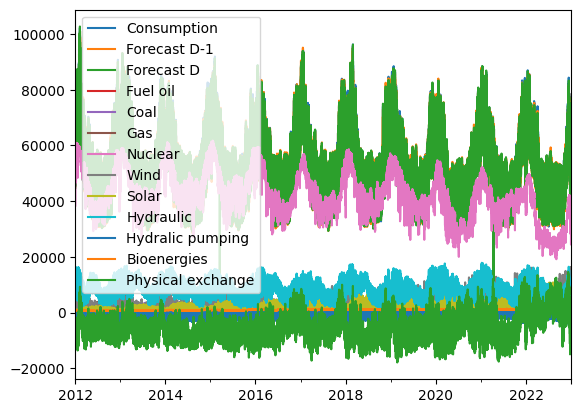

In [4]:
### ENTER YOUR CODE HERE

power_df.plot()

### END OF YOUR CODE

What do you think about this plot? What could be improved?

_Take a pause and think about it_.

Here are some thoughts about this plot:

First, it might have taken some time. It can be explained by the large number of points to plot (192684 per column). Second it is a little bit hard to read: our data is spaced by 30 min delta, however the x-axis is annual. Third, the legend is in front of the plots, preventing readability.

You can tackle some of those problems. First, you can reduce the number of points. Indeed, instead of having points each 30 min, you can have it daily.

For this, you can transform the consumption in energy (in MWh) instead of power (MW). Considering that the power is constant over each interval, you can use the following formula:

$$Energy = Power \cdot \Delta t$$

You can do this using the method `resample()` in Pandas. Check the documentation for this method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html). Remember, in this case, $\Delta t = 0.5$, because our interval between samples is 30 min (0,5 hour). 

In [5]:
### COMPLETE THE CODE HERE
### Change the "None"

daily_energy_df = power_df.resample("D").sum()*0.5

### END OF YOUR CODE

Now that you have reduced the number of points to plot, give it another try to the method `.plot()`

<Axes: >

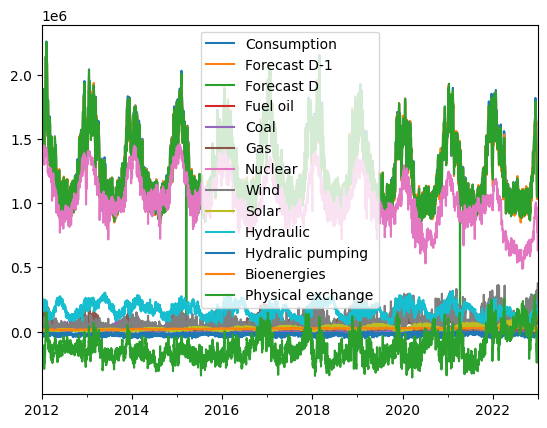

In [6]:
### ENTER YOUR CODE HERE

daily_energy_df.plot()

### END OF YOUR CODE

Compare the two graphs you have just created. Do you think it has improved? In what aspects?

_Take a pause and think about it_.

The new figure has less points to plot, the plot was faster and the graphic is slightly more readable. It has still some problems. Read the documentation of the method `.plot()` [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to get some ideas of what you can change.

First, you can change the units of your data. $10^6$ MWh is equivalent to 1 TWh, so you can divide all columns of your dataframe by $10^6$ to get all columns into TWh.

Try to change the size of the figure. Also try to put the following piece of code just after closing the parathesis to control the legends: `.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))`

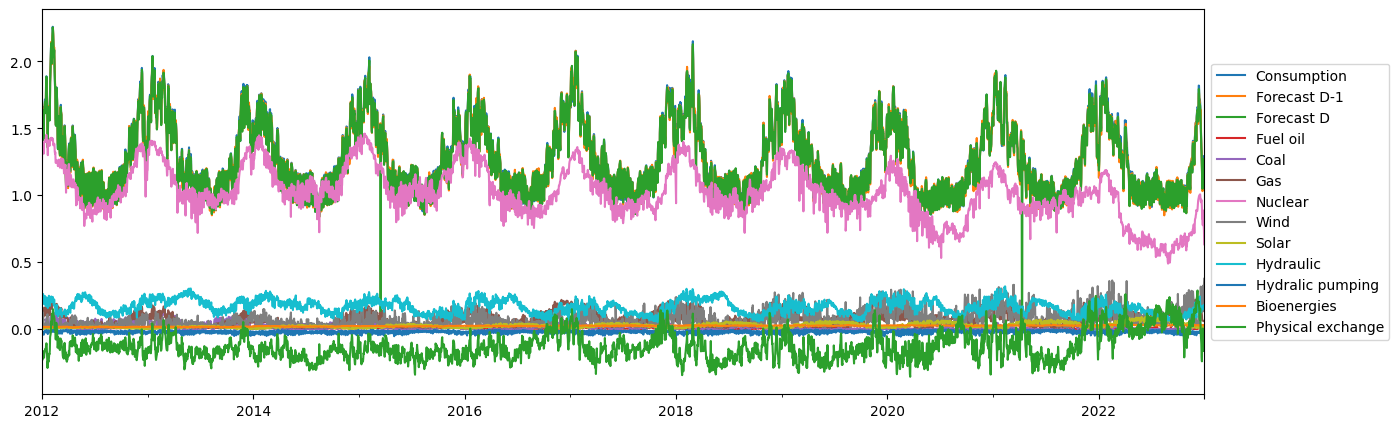

In [7]:
### ENTER YOUR CODE HERE

daily_energy_df = daily_energy_df/1e6
daily_energy_df.plot(figsize=(15,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

### END OF YOUR CODE

What do you think about this new figure? What are the room for improvements?

_Take a pause and think about it_.

This new figure is bigger and the legend does not bother anymore. There is still some room from improvement.

About the form: there is no axis label and no units on the label. For now, this is not really a problem. You are not going to show this graph to other people yet, you are just trying to get quick insights.

About the content: there are too many plots, it is difficult to concentrate on a single idea. Also, variables have different interval range. It is much easier for example to appreciate the "Consumption" variable than "Hydraulic" for example. That can be problematic to view the variable a little better.

You may want to check each variable separately. Check out the argument ```subplots``` in the method `.plot()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). As a suggestion, you can group the following variables in the same plot:

* Consumption, Forecast D-1, Forecast D, Nuclear
* Gas, Wind, Hydralic
* Bioenergies, Solar, Fuel oil

You may want to adapt the size of your figure.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

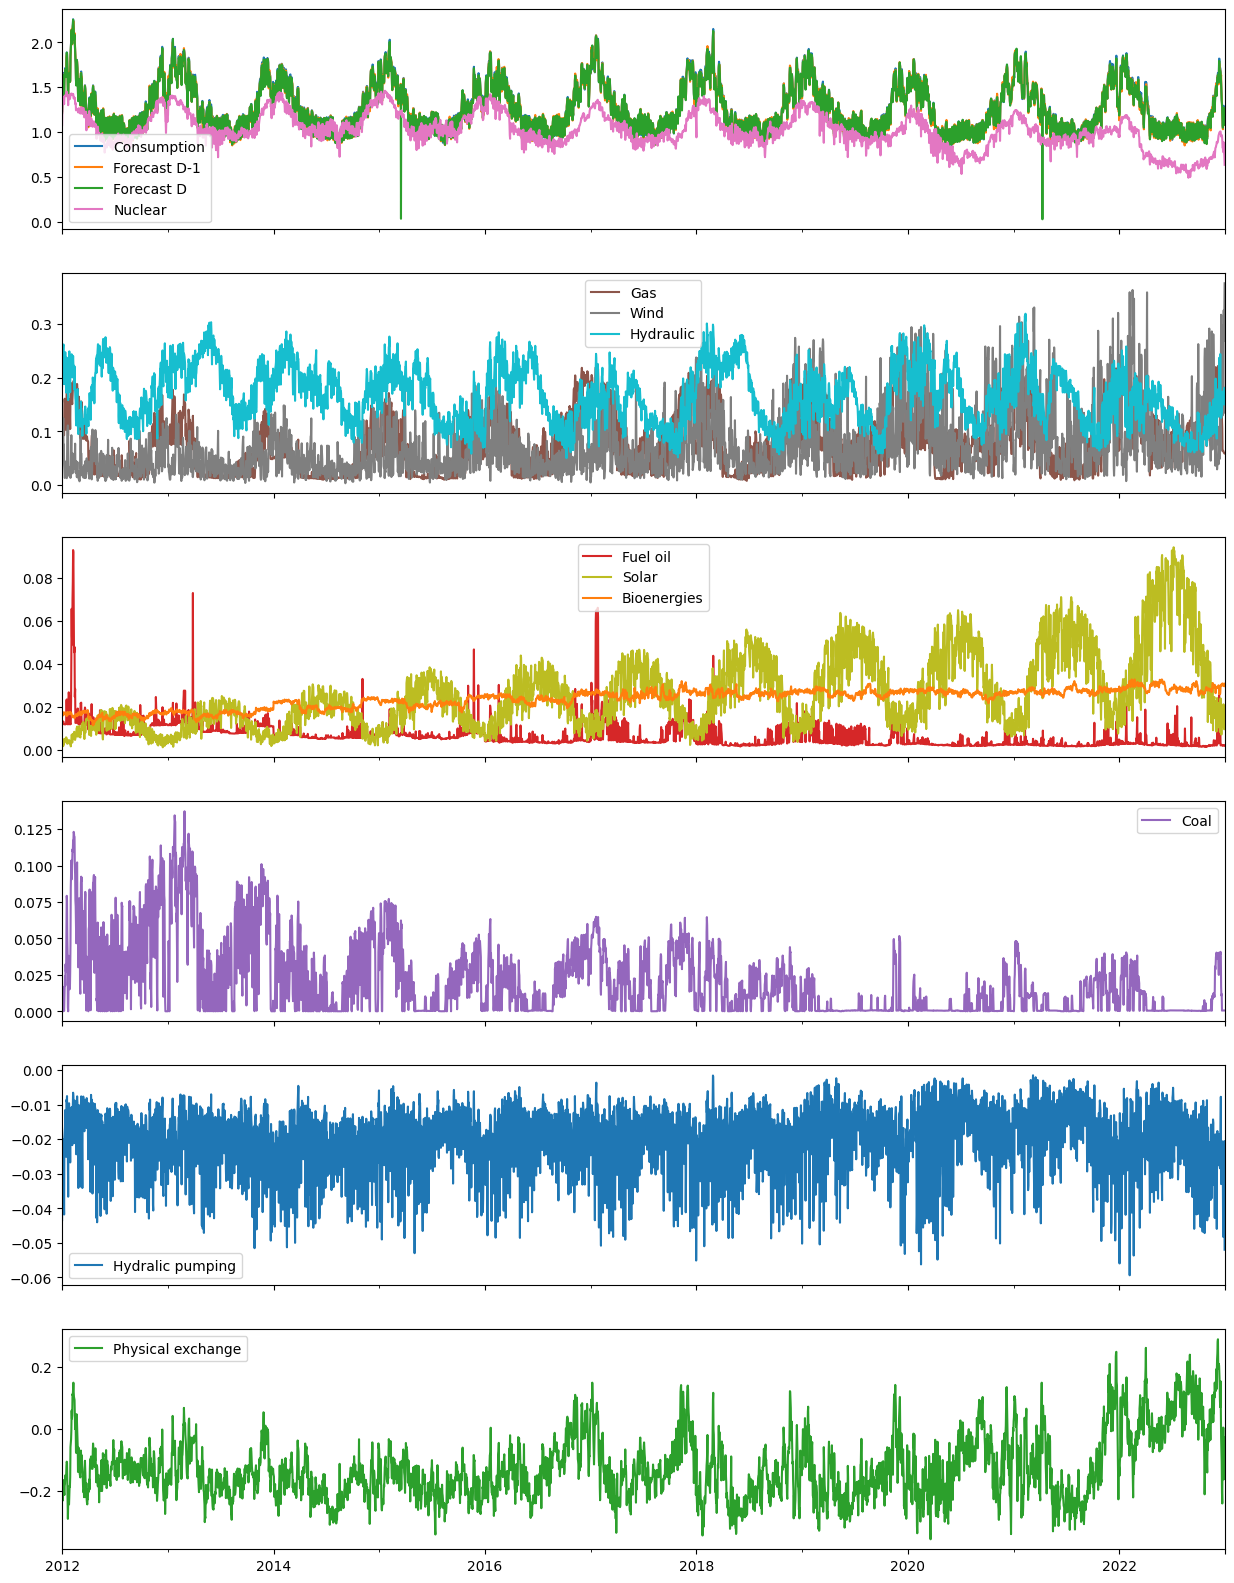

In [8]:
### ENTER YOUR CODE HERE

daily_energy_df.plot(figsize=(15,20),
                    subplots = [
                        ('Consumption', 'Forecast D-1', 'Forecast D', 'Nuclear'),
                        ('Gas', 'Wind', 'Hydraulic'),
                        ('Bioenergies', 'Solar', 'Fuel oil'),
                    ])

### END OF YOUR CODE

What insights can you already have for each variable? Think about how the value have changed over the years and how it evolves within a year.

_Take a pause and think about it_.

Here are some insights we can already have:
* Energy consumption has a yearly seasonality and peaks at the beginning and at the end of each year. This coincides with the winter and the increased need to heat.  
* Forecasts seem to be close to actual consumption. You do not have any indication on what is considered a good error for forecast. Therefore, classifying it as "good" can, at this stage, be precipitated.
* Nuclear energy production is close to actual consumption. Visually it seems to be the most important source for France. A reduction in nuclear production is noticed in 2022.
* There are at least two outliers for ```Forecast D```. It could be interesting to investigate.
* Wind production have high variation over the year. Maybe is it due to the variability of wind?
* Solar energy production has steadily increase of the years. Contrarily to energy consumption, solar energy production seems to peak in the middle of the years. This coincides with summertime and more sun time exposition.
* Coal usage varies a lot, but it seems to be reducing over the years.
* Up until 2022, physical exchange of energy tended to be negative (France exported more energy than imported). This dynamic was inverted in 2022.

These insights could be useful to share with your client (with cleaner visualization) if their needs are still vague or unclear. Those insights could help them choose what aspects might be more important to them.

Up until now, you have not directly used any other specific plotting library. You could have quick and good insights with a simple API from Pandas.

By default, Pandas uses ```matplotlib``` to support the ```.plot()``` method. ```matplotlib``` does not create interactive charts. It is not possible to zoom in or zoom out, neither to know more about the x and y values for a specific point. By simple inspection, you cannot be sure about the dates of the outliers of the columns ```Forecast D```. You can know it is around March-April of 2015 and 2021, but it is impossible to get the exact date. That would have been possible with ```plotly```.

Good news: you can still use the simple ```.plot()``` API from Pandas and have a ```plotly``` graph. Check the ```backend``` argument in the documentation of the method `.plot()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)).

Be aware that you cannot use the arguments ```figsize``` or ```subplots``` if you set the ```backend``` to ```plotly```. However you can set what columns you want to display with the argument ```y```.

Display the columns `Consumption`, `Forecast D-1`, `Forecast D`, `Nuclear` with the Pandas method ```.plot()```, setting the `backend` as `plotly`.

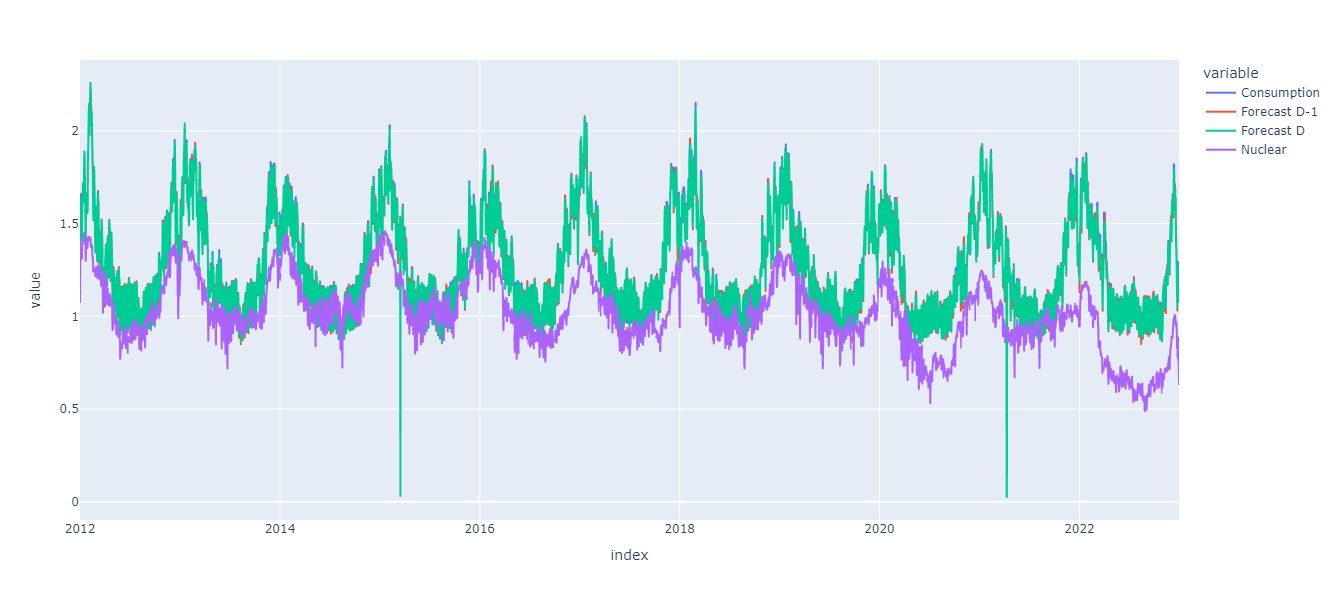

In [9]:
### ENTER YOUR CODE HERE

daily_energy_df.plot(y = ['Consumption', 'Forecast D-1', 'Forecast D', 'Nuclear'],
                    backend="plotly"
)

### END OF YOUR CODE

Pass your mouse in the figure and try to find the date of the outliers of "Forecast D". You will only get the month and the year. If you want to know the exact date, zoom in choosing the x intervals direct in the picture. Use the "autoscale" option to suppress the zoom. Try to figure out the dates of the outliers. You will realize that actually there are three of them. You can get the answer to this at the end of this notebook.

Outliers can be tricky. Sometimes it is due to bad quality data. Indeed, in this case, it must probably be it, otherwise why would there be such exceptionally bad forecasts?  If they are not due to bad quality data, they can reveal interesting insights or cause problems with modelling. If outliers seem to be interesting to your study, try to understand their occurrence with the data owner.

For the sake of this assignment, you can assume those outliers are due to bad quality data and artificially suppress it by setting them to the value of the variable `Forecast D-1`.

In [10]:
### ENTER YOUR CODE HERE

daily_energy_df.loc[pd.to_datetime("2015-03-17"), "Forecast D"] = daily_energy_df.loc[pd.to_datetime("2015-03-17"), "Forecast D-1"]
daily_energy_df.loc[pd.to_datetime("2021-04-10"), "Forecast D"] = daily_energy_df.loc[pd.to_datetime("2021-04-10"), "Forecast D-1"]
daily_energy_df.loc[pd.to_datetime("2021-04-11"), "Forecast D"] = daily_energy_df.loc[pd.to_datetime("2021-04-11"), "Forecast D-1"]

### END OF YOUR CODE

Plot again the column `Forecast D` to verify you have removed the outlier.

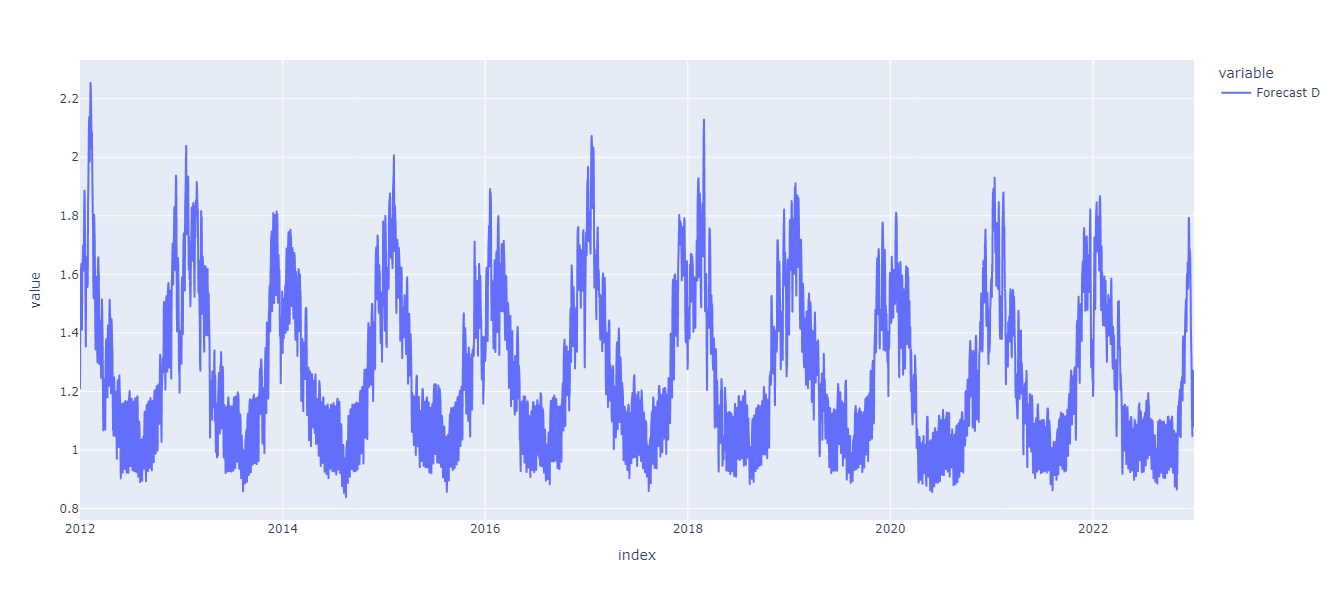

In [11]:
### ENTER YOUR CODE HERE

daily_energy_df["Forecast D"].plot(backend="plotly")

### END OF YOUR CODE

You have already gathered some interesting information. Congratulations.

Now, let's produce some graphs to your client. They are interested in the evolution over the year and the seasonality of electricity consumption.

Remember, for your client, you must present clean and clear graphs, possibly one graph for each key message.

Before producing awesome graphs, you can resample your data to have monthly and yearly data.

In [12]:
### ENTER YOUR CODE HERE

monthly_energy_df = daily_energy_df.resample("M").sum()
yearly_energy_df = monthly_energy_df.resample("Y").sum()

### END OF YOUR CODE

Before keep going with this assignment, think about what graphs you would produce, taking into consideration your client's request and the insights you have got so far.

_Take a pause and think about it_.

The graphs you will produce next are suggestion to satisfy your client's request. Do not hesitate to create others if you would like.

From now on, use `plotly.express` or `plotly.graph_objs`.

## Graphs on energy consumption 

First, you can produce a [bar plot](https://plotly.com/python/bar-charts/) to visualize the evolution of the annual energy consumption year to year. Remember, you will show this graph to your client, so set a title and axis labels.

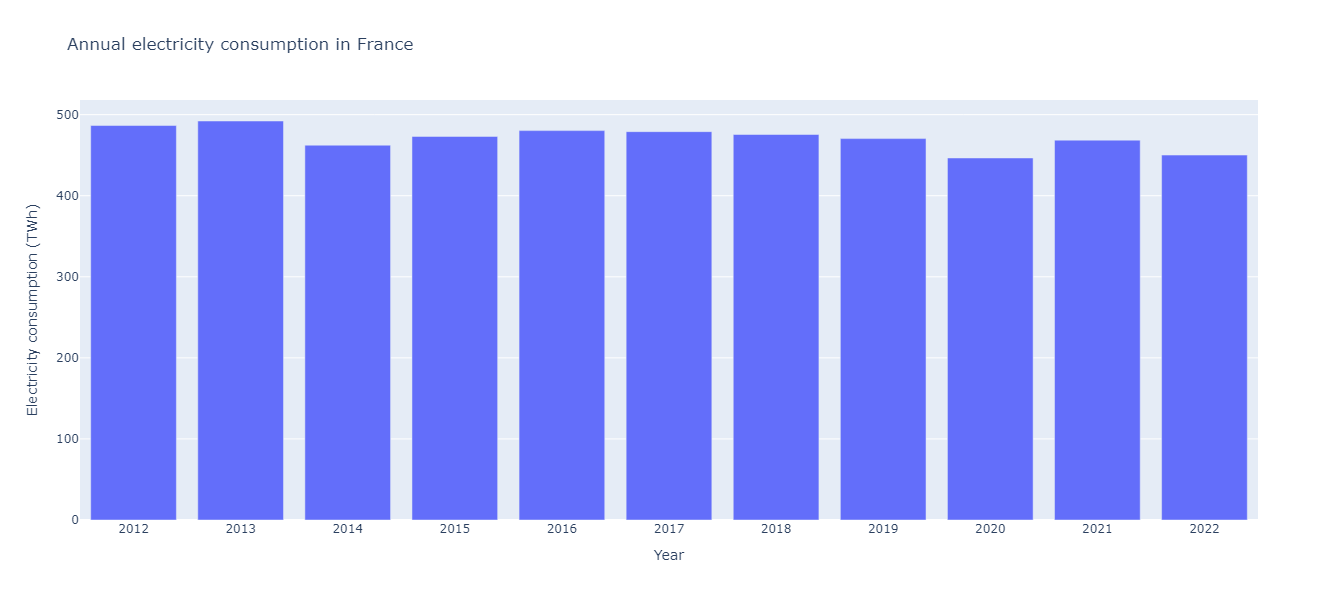

In [13]:
### ENTER YOUR CODE HERE

px.bar(yearly_energy_df,
       x = yearly_energy_df.index.strftime("%Y"),
       y = "Consumption",
       labels ={
           "x": "Year",
           "Consumption": "Electricity consumption (TWh)"
       },
       title = "Annual electricity consumption in France",
       width=600)

### END OF YOUR CODE

Compare your results with the official results [here](https://analysesetdonnees.rte-france.com/consommation/synthese). The results are pretty close. The differences come from the approximation of the equation transforming power into energy (it has been considered that the power is constant over each 30-minute interval between each sample.)

To visualize the effects of the yearly seasons, you can plot the energy consumption over the months, superposing curves from each year.

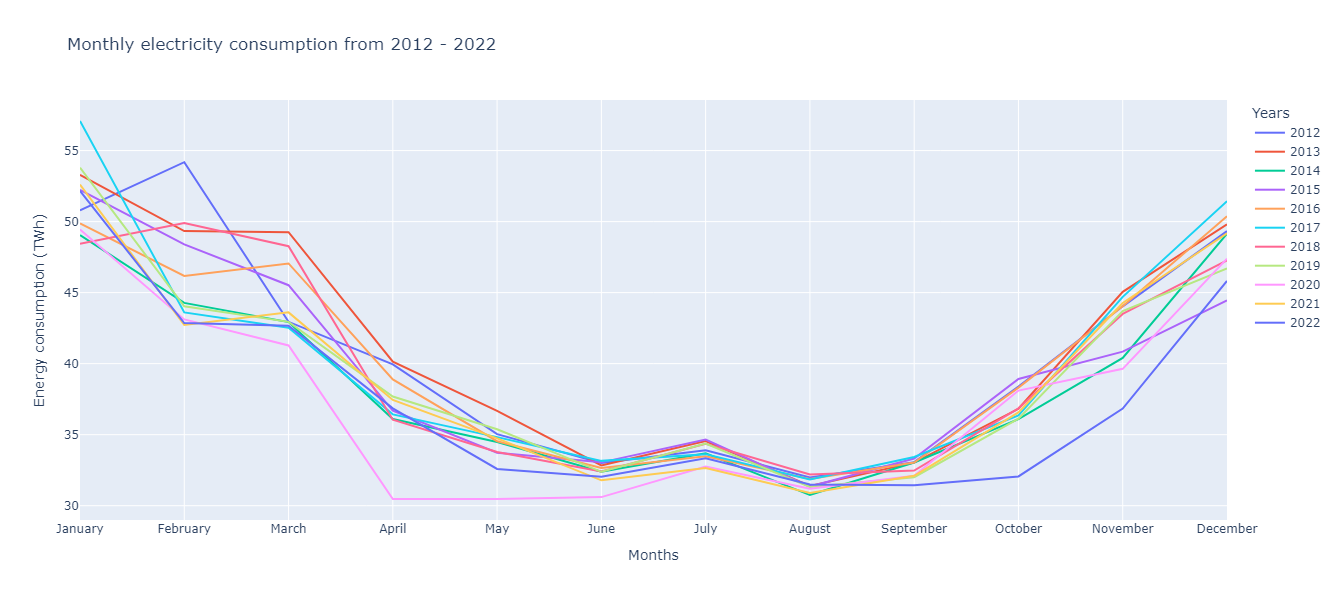

In [14]:
### ENTER YOUR CODE HERE

px.line(monthly_energy_df,
        x = monthly_energy_df.index.strftime("%B"),
        y = "Consumption",
        color = monthly_energy_df.index.strftime("%Y"),
        labels = {
            "x": "Months",
            "Consumption": "Energy consumption (TWh)",
            "color": "Years"
        },
        title = "Monthly electricity consumption from 2012 - 2022")

### END OF YOUR CODE

This graph shows that electricity consumption is higher through November to February and a drop is observed through June to September. This seasonality is correlated to the seasons of the year and variation on average temperature (higher electricity consumption during winter and less during summer). Three periods which seem somewhat outliers. Can you identify them? Can you associate to any particular event?

_Take a pause and think about it_.

The three outlier periods are:

* A peak of consumption in February 2012. At this time, there was a particularly intense cold wave in Europe. The press reported a peak of electricity consumption in France on 8 February 2012. This is still the peak in our dataset. You can check is using the method `.idxmax()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)). Some press articles on this event:
    * [La France bat un record de consommation électrique](https://www.lesechos.fr/2012/02/la-france-bat-un-record-de-consommation-electrique-351079) by Les Echos, in French
    * [Nouveau record pour la consommation d'électricité](https://www.lemonde.fr/economie/article/2012/02/08/nouveau-record-pour-la-consommation-d-electricite_1640650_3234.html) by Le Monde, in French
    * [Electricity consumption in France to hit new high as cold snap continues](https://www.rfi.fr/en/france/20120207-electricity-consumption-france-set-new-record) by RFI
    * [Early 2012 European cold wave](https://en.wikipedia.org/wiki/Early_2012_European_cold_wave), article by Wikipedia
* A drop in electricity from March to June, with a notable drop in April (-15% compared to 2018, the second least consumption in this month). This coincides with the peak of Covid-19 crises. France was in lockdown from 17 March to 11 May 2020. Some articles stating those drops:
    * [Bilan Electrique 2020](https://assets.rte-france.com/prod/public/2021-03/Bilan%20electrique%202020_0.pdf) by RTE, in French
    * [Covid-19: infected electricity markets](https://www.tse-fr.eu/covid-19-infected-electricity-markets), by Stefan AMBEC and Claude CRAMPES in Toulouse School of Economics website.
* A drop in electricity in 2022 starting in October. There was a major energy crisis in France in 2022, due to Russia's invasion of Ukraine and drop in nuclear production, as you have already noticed. At the same time, government reinforced energy-saving messages, which seemed to be successful. Get more details on this drop in the [Annual Electricity Review 2022](https://analysesetdonnees.rte-france.com/en/electricity-review-keyfindings) by RTE.

There can be another interesting way to express the seasonality. You can present the data for each month as a [box plot](https://plotly.com/python/box-plots/). In this way, your client can get a gasp of daily distribution of the consumption for each month. Note that box plot is not obvious for everybody, so be assured that your client can understand it or take your time to explain it.

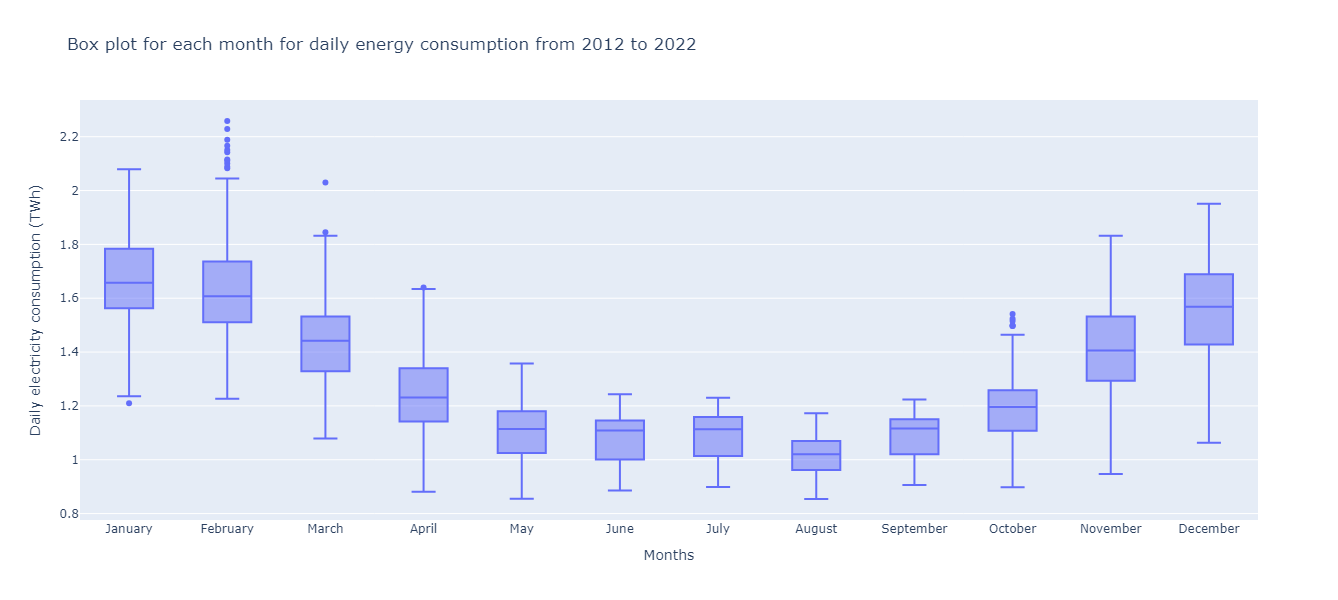

In [15]:
### ENTER YOUR CODE HERE

px.box(daily_energy_df,
       x=daily_energy_df.index.strftime("%B"), 
       y="Consumption",
       labels={
           "x": "Months",
           "Consumption": "Daily electricity consumption (TWh)"
       },
       title = "Box plot for each month for daily energy consumption from 2012 to 2022")

### END OF YOUR CODE

You can also explore the seasonality by the day of the year, giving the mean electricity consumption for every day of the year with a range of max and min value observed on the day from 2012 to 2022. You can do this  by grouping the consumption by day of the year and using mean, max and min as aggregation function. Check the documentation for `.group_by()` method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) if needed. Check out [this example](https://plotly.com/python/continuous-error-bars/) to get inspired on how to display ranges.

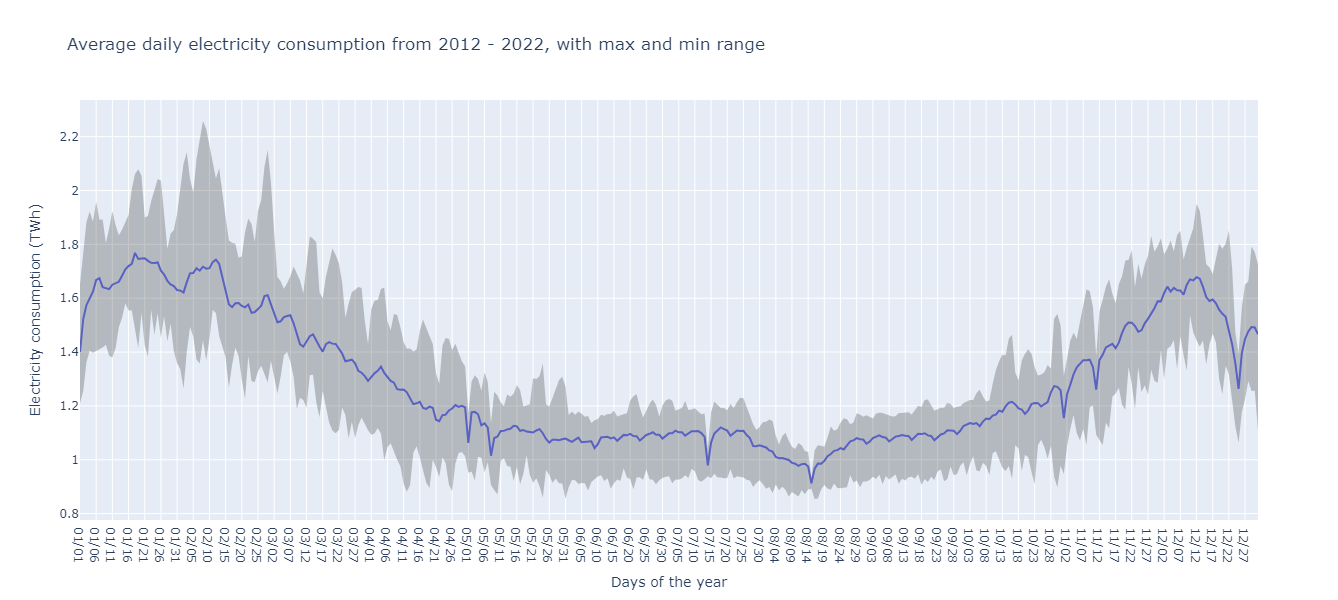

In [16]:
### ENTER YOUR CODE HERE

consumption_groupby = daily_energy_df["Consumption"].groupby(
    by = daily_energy_df.index.strftime("%m/%d")
).agg(["mean", "max", "min"])
consumption_groupby = consumption_groupby.drop(index="02/29")

fig = go.Figure([
    go.Scatter(
        name='Mean',
        x=consumption_groupby.index,
        y=consumption_groupby['mean'],
        mode='lines',
        #line=dict(color='rgb(31, 119, 180)'),
        showlegend=False
    ),
    go.Scatter(
        name='Max',
        x=consumption_groupby.index,
        y=consumption_groupby['max'],
        mode='lines',
        #marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Min',
        x=consumption_groupby.index,
        y=consumption_groupby['min'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])

fig.update_layout(
    yaxis_title='Electricity consumption (TWh)',
    xaxis_title='Days of the year',
    title='Average daily electricity consumption from 2012 - 2022, with max and min range',
    hovermode="x",
    width = 1200,
    height = 600
)
fig.show()

### END OF YOUR CODE

In this graph, you can check that indeed the peak of electricity consumption has occured on a 8 February.

There are some days with observable trough compared to neighbor days. What that could be?

_Take a pause and think about it_.

These troughs all coincide with public holidays in France. Check this list [here](https://en.wikipedia.org/wiki/Public_holidays_in_France).

Another way to explore seasonality is to show the how the electricity consumption evolves according to the weekday. For this, you can group the consumption by day of the week and use the mean as aggregation function.

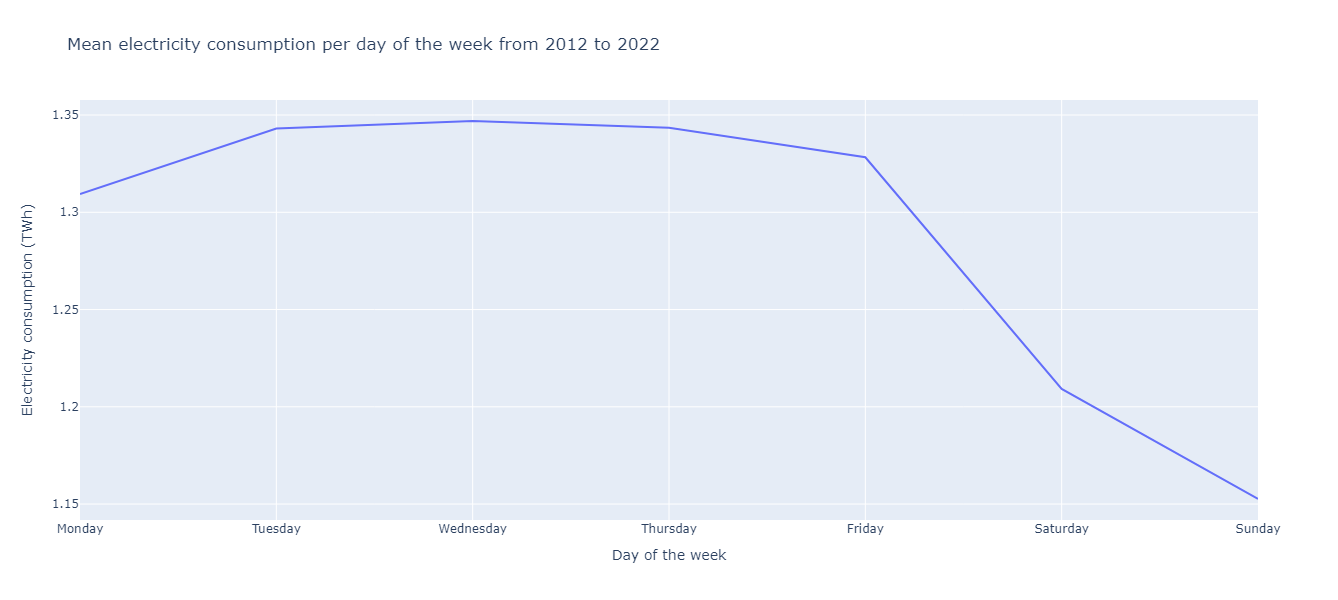

In [17]:
### ENTER YOUR CODE HERE

energy_group_by_month_dayweek = daily_energy_df[["Consumption"]].groupby(
    by = [daily_energy_df.index.strftime("%A")]).agg("mean")
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
energy_group_by_month_dayweek = energy_group_by_month_dayweek.loc[days_of_week]

px.line(energy_group_by_month_dayweek,
        x = energy_group_by_month_dayweek.index,
        y = "Consumption",
        labels ={
            "index": "Day of the week",
            "Consumption": "Electricity consumption (TWh)"
        },
        title = "Mean electricity consumption per day of the week from 2012 to 2022")

### END OF YOUR CODE

This graph shows that, in average, the electricity consumption plateaus from Tuesday to Thursday, with a slight drop on Friday and a consequent drop on the weekends. A Sunday consumption is in average 13% lower than the consumption on a Friday.

You can couple the information on weekly and yearly seasonality in one single graph, showing the evolution in a single graph. For that, you must group the daily energy consumption by weekday and month of the year, taking the mean as aggregation function.

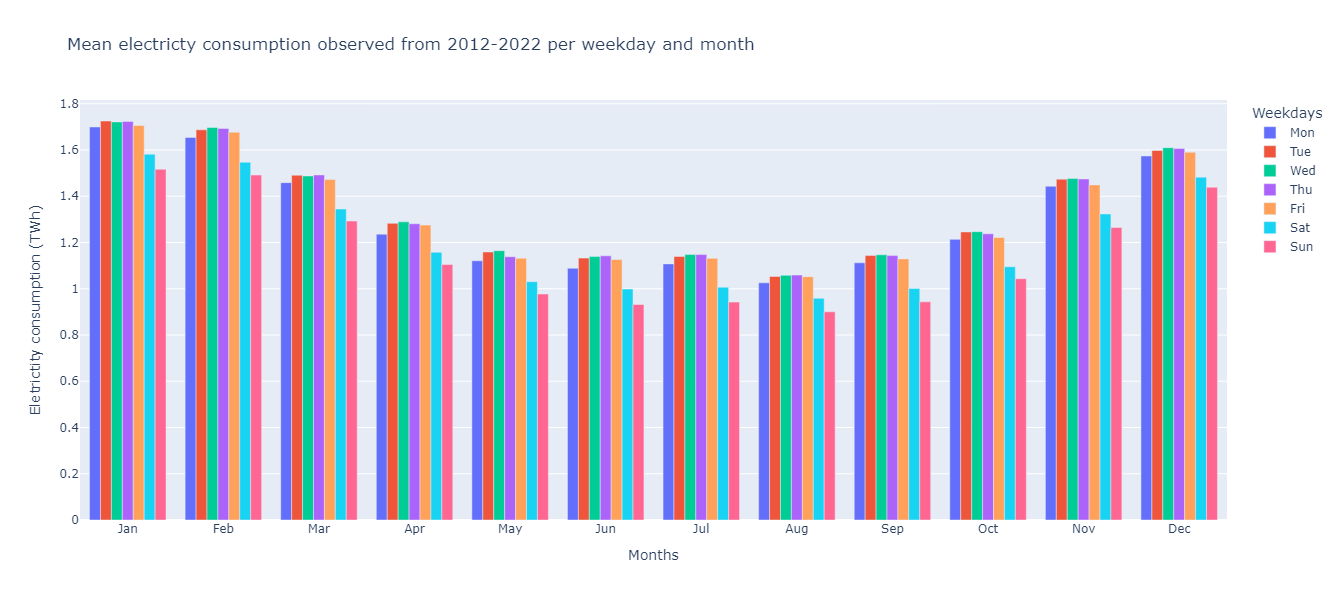

In [18]:
### ENTER YOUR CODE HERE

energy_group_by_month_dayweek = daily_energy_df[["Consumption"]].groupby(
    by = [daily_energy_df.index.strftime("%b"), daily_energy_df.index.strftime("%a")]).agg("mean")
    
days_of_week = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

index_month_day = pd.MultiIndex.from_product([daily_energy_df.index.strftime("%b").unique(), days_of_week])

energy_group_by_month_dayweek = energy_group_by_month_dayweek.loc[index_month_day]
energy_group_by_month_dayweek = energy_group_by_month_dayweek.reset_index(names=["Months", "Weekdays"])

px.bar(energy_group_by_month_dayweek,
       x = "Months",
       y = "Consumption",
       color = "Weekdays",
       barmode="group",
      labels = {
          "Consumption": "Eletrictity consumption (TWh)",
      },
      title = "Mean electricty consumption observed from 2012-2022 per weekday and month")

### END OF YOUR CODE

Finally, you can explore the hourly seasonality. First, you can check how on average the consumption changes over hours. For this, you can use the `power_df` dataframe and group by the consumption (in power, not energy this time) using the mean as aggregation function.

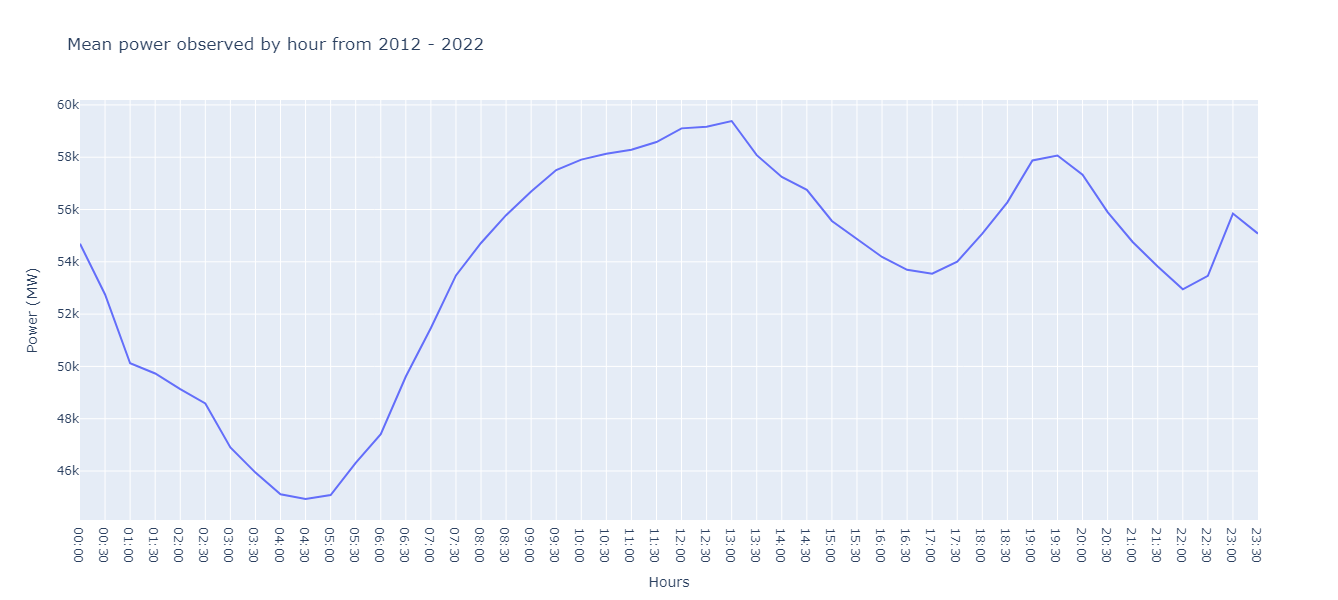

In [19]:
### ENTER YOUR CODE HERE

power_group_by_hour = power_df[["Consumption"]].groupby(
    by = power_df.index.strftime("%H:%M")
).agg("mean")

px.line(power_group_by_hour,
        x = power_group_by_hour.index,
        y = "Consumption",
       labels={
           "index": "Hours",
           "Consumption": "Power (MW)"
       },
       title = "Mean power observed by hour from 2012 - 2022")

### END OF YOUR CODE

This graph shows that there are troughs at 4:30, 17:00 and 22:00 and there are peaks at 13:00, 19:30 and 23:00. Those times coincides with some moments of life (sleeping, meals, coming back home at night, etc). You can verify if this graph has the same slop for each month of the year, grouping consumption by hour of the day and month, using mean as aggregating function. 

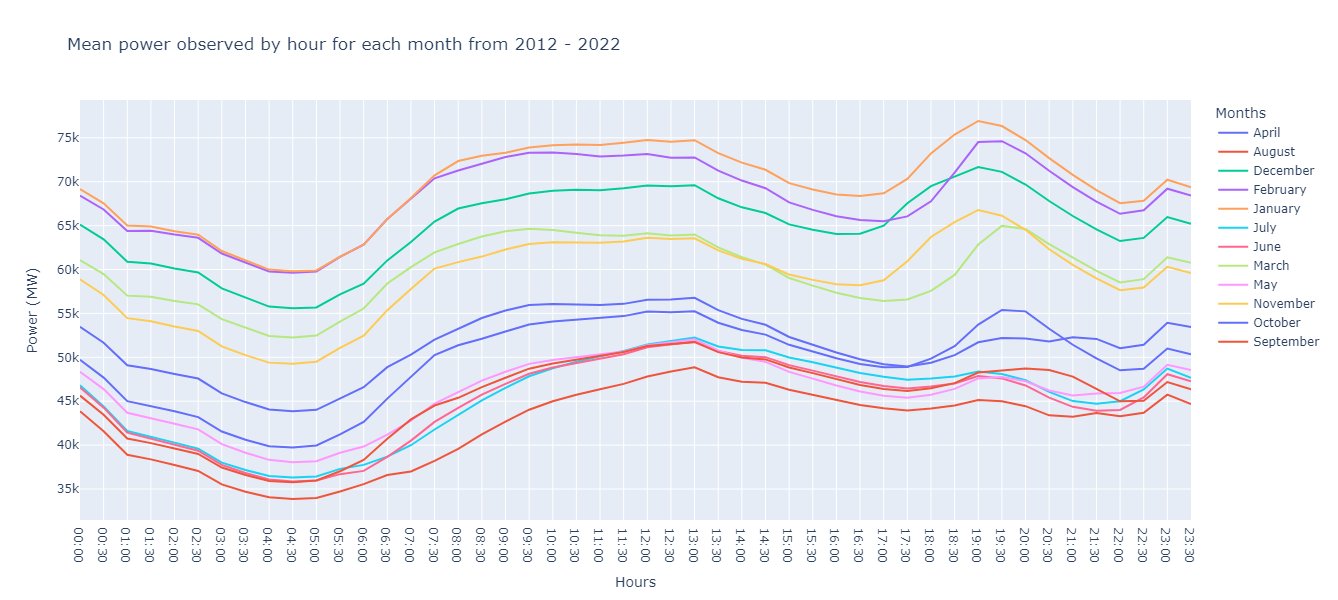

In [20]:
### ENTER YOUR CODE HERE

power_group_by_hour_month = power_df[["Consumption"]].groupby(
    by = [power_df.index.strftime("%H:%M"), power_df.index.strftime("%B")],
).agg("mean").reset_index(names=["Hours", "Months"])

fig = px.line(power_group_by_hour_month,
        x = "Hours",
        y = "Consumption",
        color = "Months",
        labels={
           "Consumption": "Power (MW)",
       },
       title = "Mean power observed by hour for each month from 2012 - 2022")

fig.update_traces(hovertemplate=None)

fig.update_layout(
    hovermode = "x unified"
)

### END OF YOUR CODE

You can see that every month has a mean slope which looks the same, more power is required during from November to March. Peaks and trough times also vary according to the month.

You have done a great job exploring the evolution of electricity consumption from 2012 to 2022 and exploring seasonality: hour of the day, day of the week and month of the year. You could even relate some interesting visualization to particular events. Do not hesitate to create other graphs if you think your client would like.

Congratulations! You have reached the end of this notebook. In this assignment, you have done/learnt:

* How to quickly explore your dataframe using the method `.plot()` from Pandas
* You can change the backend of this method to define the library you want to use to plot
* You have use `ploty` in its two versions: ploty express and graph objects
* You have created different visualizations: line, bar plot and box plot.

You can keep practicing with this same dataframe. What insights could you get for example from electricity production and how renewable sources are evolving? Try exploring different visualizations also.

Have fun 😃